In [2]:
import cavendish.utils.Dataloader as dl

In [7]:

import os
from sympy import symbols, Eq, latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
print(os.getcwd())

c:\Users\casey\advanced_exp\FAFO


In [10]:


dfs = dl.load_convert("../Databases/Cavendish-Experiment-PHY64-In-person-data.csv")

MultiIndex([('Measurement 1',      'Time (sec)'),
            ('Measurement 1',   'Position (cm)'),
            ('Measurement 1', 'Uncertainty (m)')],
           )
MultiIndex([('Measurement 2',      'Time (sec)'),
            ('Measurement 2',   'Position (cm)'),
            ('Measurement 2', 'Uncertainty (m)')],
           )
MultiIndex([('Measurement 3',      'Time (sec)'),
            ('Measurement 3',   'Position (cm)'),
            ('Measurement 3', 'Uncertainty (m)')],
           )
MultiIndex([('Measurement 4',      'Time (sec)'),
            ('Measurement 4',   'Position (cm)'),
            ('Measurement 4', 'Uncertainty (m)')],
           )


In [16]:
display(dfs[0].head())
display(dfs[2].head())

Measurement 1                            
     Time (sec)   Radians Uncertainty (rad)
0             0 -0.007941             0.002
1            20 -0.008940             0.002
2            40 -0.011469             0.002
3            60 -0.014525             0.002
4            80 -0.017933             0.002

Measurement 3                            
     Time (sec)   Radians Uncertainty (rad)
0             0 -0.007294             0.002
1            20 -0.007823             0.002
2            40 -0.009940             0.002
3            60 -0.013350             0.002
4            80 -0.017052             0.002

In [18]:
time1 = np.array(time1, dtype=float)
position1 = np.array(position1, dtype=float)
time3 = np.array(time3, dtype=float)
position3 = np.array(position3, dtype=float)


Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)
Guessed parameters: theta0 = 0.745, period = 241.517, amp = 0.121, delta = 1.526, b = 0.001
Fitted function: $\0.745 + 0.121 \cdot \sin\left(\frac{2\pi}{241.517} t + 1.526\right) \cdot e^{-0.001t}$


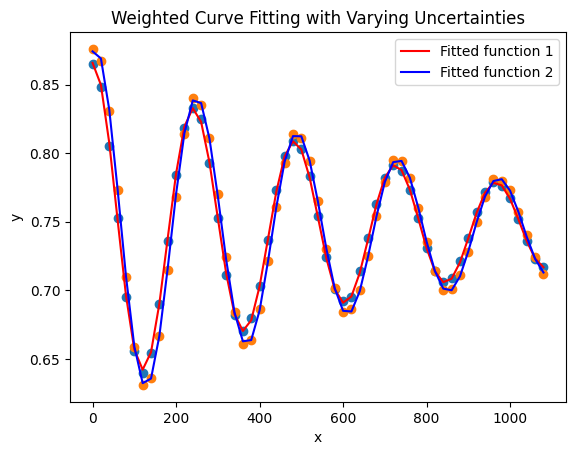

In [20]:


def damped_oscillation(time, theta0, period,amp,delta, b):
    """
    Function to be fit to the data. operates on a point-wise basis.
    
    Arguments:
    time (_float_): time value
    theta0 (_float_): equilibrium value of theta
    amp (_float_): amplitude of osscilations
    period (_float_):
    delta (_float_): 
    b (_float_)
    """
    return theta0 + amp*np.sin(((2*np.pi)/period)*time+delta)*np.exp(-b*time)


p1, cov1 = curve_fit(damped_oscillation, time1, position1, p0 = [theta1, 240,.095, .01, 0.01])
p3, cov3 = curve_fit(damped_oscillation, time3, position3, p0 = [theta1, 240,.095, .01, 0.01])



print(f"Fitted function: theta0 + amp * np.sin((2*np.pi/period)*time + delta) * np.exp(-b*time)")
print(f"Guessed parameters: theta0 = {p1[0]:.3f}, period = {p1[1]:.3f}, amp = {p1[2]:.3f}, delta = {p1[3]:.3f}, b = {p1[4]:.3f}")

# Print the fitted function in LaTeX with the fitted parameters
fitted_function_latex = f"$\\{p1[0]:.3f} + {p1[2]:.3f} \\cdot \\sin\\left(\\frac{{2\\pi}}{{{p1[1]:.3f}}} t + {p1[3]:.3f}\\right) \\cdot e^{{-{p1[4]:.3f}t}}$"

print(f"Fitted function: {fitted_function_latex}")



plt.plot(time1, damped_oscillation(time1, *p1), label='Fitted function 1', color='red')
plt.plot(time3, damped_oscillation(time3, *p3), label='Fitted function 2', color='blue')
plt.scatter(time1, position1)
plt.scatter(time3, position3)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Weighted Curve Fitting with Varying Uncertainties')
plt.show()


$\theta = 0.745 + 0.121 \cdot \sin\left(\frac{2\pi}{241.517} t + 1.526\right) \cdot e^{-0.001t}$

theta0 = 0.7451 ± 0.0001
period = 241.5170 ± 0.0992
amp = 0.1209 ± 0.0005
delta = 1.5260 ± 0.0044
b = 0.0013 ± 0.0000
ight) \cdot e^{-0.001t}$+ 0.121 \cdot \sin\left(rac{2\pi}{241.517} t + 1.526


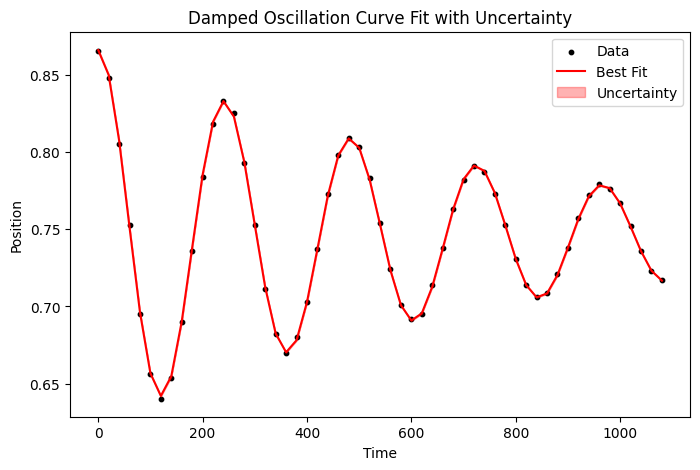

In [7]:
# Define the damped oscillation function
def damped_oscillation(time, theta0, period, amp, delta, b):
    """
    Function to be fit to the data. Operates on a point-wise basis.
    
    Arguments:
    time (_float_): time value
    theta0 (_float_): equilibrium value of theta
    amp (_float_): amplitude of oscillations
    period (_float_): oscillation period
    delta (_float_): phase shift
    b (_float_): damping coefficient
    """
    return theta0 + amp * np.sin(((2 * np.pi) / period) * time + delta) * np.exp(-b * time)

# Fit the curve
popt, pcov = curve_fit(damped_oscillation, time1, position1, p0=[theta1, 240, 0.095, 0.01, 0.01])

# Calculate parameter uncertainties
perr = np.sqrt(np.diag(pcov))

# Print fitted parameters with uncertainties
param_names = ["theta0", "period", "amp", "delta", "b"]
for i, name in enumerate(param_names):
    print(f"{name} = {popt[i]:.4f} ± {perr[i]:.4f}")

# Print the fitted function in LaTeX
fitted_function_latex = (f"${popt[0]:.3f} + {popt[2]:.3f} \cdot \sin\left(\frac{{2\pi}}{{{popt[1]:.3f}}} t + {popt[3]:.3f}\right) "
                         f"\cdot e^{{-{popt[4]:.3f}t}}$")
print(f"Fitted function: {fitted_function_latex}")

# Monte Carlo sampling to visualize uncertainty
n_samples = 100
drawn_params = np.random.multivariate_normal(popt, pcov, size=n_samples)
y_samples = np.array([damped_oscillation(time1, *params) for params in drawn_params])
y_mean = np.mean(y_samples, axis=0)
y_std = np.std(y_samples, axis=0)

# Plot the fitted function with uncertainty bounds
plt.figure(figsize=(8, 5))
plt.scatter(time1, position1, label='Data', color='black', s=10)
plt.plot(time1, damped_oscillation(time1, *popt), label='Best Fit', color='red')
plt.fill_between(time1, y_mean - y_std, y_mean + y_std, color='red', alpha=0.3, label='Uncertainty')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Oscillation Curve Fit with Uncertainty')
plt.show()
